In [1]:
import pandas as pd
from pandas import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
df = pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')
df['RA_CAERS Created Date']=pd.to_datetime(df['RA_CAERS Created Date'], format='%m/%d/%Y')
df['AEC_Event Start Date']=pd.to_datetime(df['AEC_Event Start Date'], format='%m/%d/%Y')
df.rename(columns={'RA_CAERS Created Date': 'ReportDate',
                  'AEC_Event Start Date': 'EventDate',
                  'AEC_One Row Outcomes': 'Outcome',
                  'SYM_One Row Coded Symptoms': 'Symptoms',
                  'CI_Age at Adverse Event': 'Age',
                  'CI_Gender': 'Gender',
                  'PRI_Reported Brand/Product Name': 'ProductBrandName',
                  'PRI_FDA Industry Name': 'Industry'}, 
         inplace=True)
print(df.shape)



(90784, 12)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 12 columns):
RA_Report #              90784 non-null int64
ReportDate               90784 non-null datetime64[ns]
EventDate                53651 non-null datetime64[ns]
PRI_Product Role         90784 non-null object
ProductBrandName         90784 non-null object
PRI_FDA Industry Code    90784 non-null int64
Industry                 90784 non-null object
Age                      52924 non-null float64
CI_Age Unit              90784 non-null object
Gender                   90784 non-null object
Outcome                  90784 non-null object
Symptoms                 90779 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 8.3+ MB


In [3]:
df.head(10)

,RA_Report #,ReportDate,EventDate,PRI_Product Role,ProductBrandName,PRI_FDA Industry Code,Industry,Age,CI_Age Unit,Gender,Outcome,Symptoms
0,65325,2004-01-01,2003-08-04,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,2004-01-01,2003-08-04,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,2004-01-01,NaT,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,2004-01-01,2003-11-24,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,2004-01-01,NaT,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"
5,65345,2004-01-01,2003-12-21,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
6,65350,2004-01-01,NaT,Suspect,GRAPE,20,Fruit/Fruit Prod,NaN,Not Available,Not Available,DEATH,"DEATH, CHOKING"
7,65353,2004-01-02,2003-12-01,Suspect,HERBALIFE RELAX NOW,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Female,VISITED A HEALTH CARE PROVIDER,"PARANOIA, PHYSICAL EXAMINATION, DELUSION"
8,65353,2004-01-02,2003-12-01,Suspect,HERBALIFE TOTAL CONTROL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Female,VISITED A HEALTH CARE PROVIDER,"PARANOIA, PHYSICAL EXAMINATION, DELUSION"
9,65354,2004-01-02,NaT,Suspect,YOHIMBE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Year(s),Male,REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.,BLOOD PRESSURE INCREASED


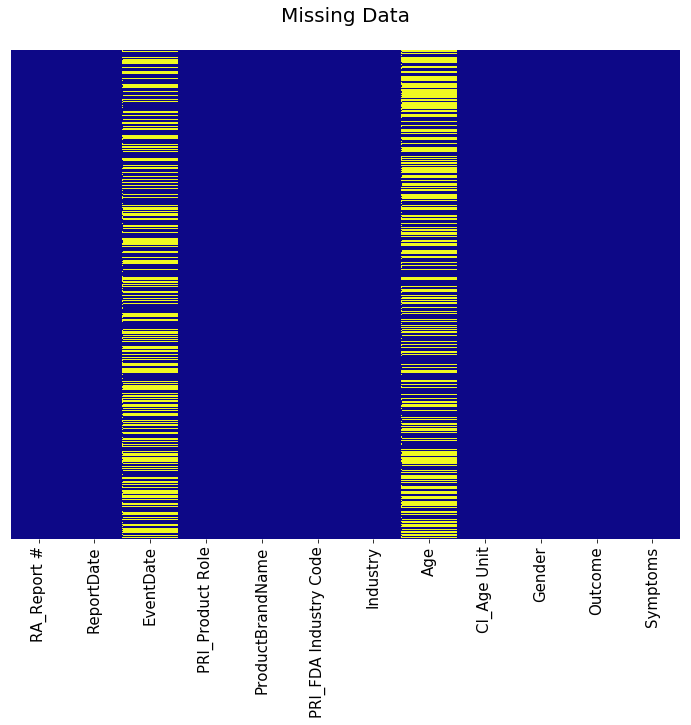

In [4]:
#check for missing values
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull(),
            cmap='plasma',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data\n',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Adverse event counts by product type')

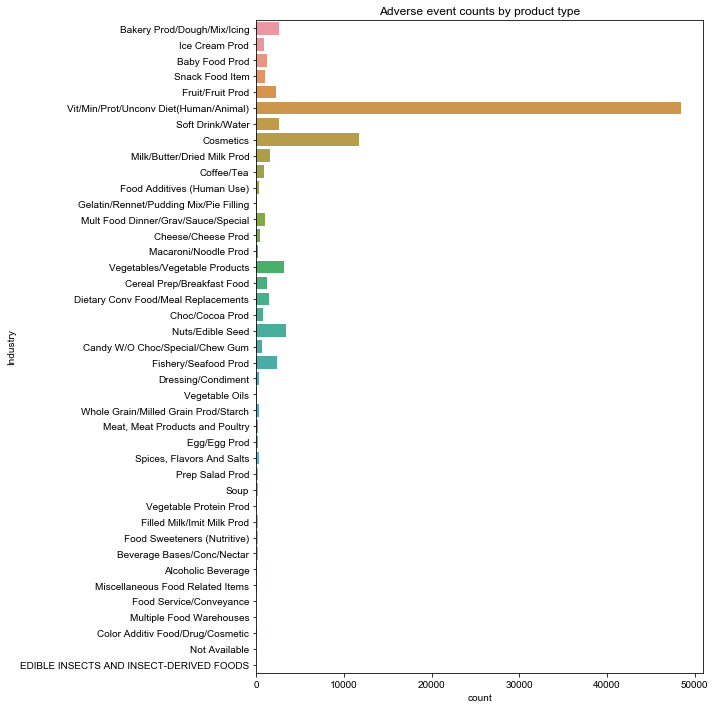

In [5]:
# Adverse event counts by product type
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,12))
sns.set_style("ticks")
sns.countplot(y=df['Industry']).set_title('Adverse event counts by product type')

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Adverse event counts by product type')

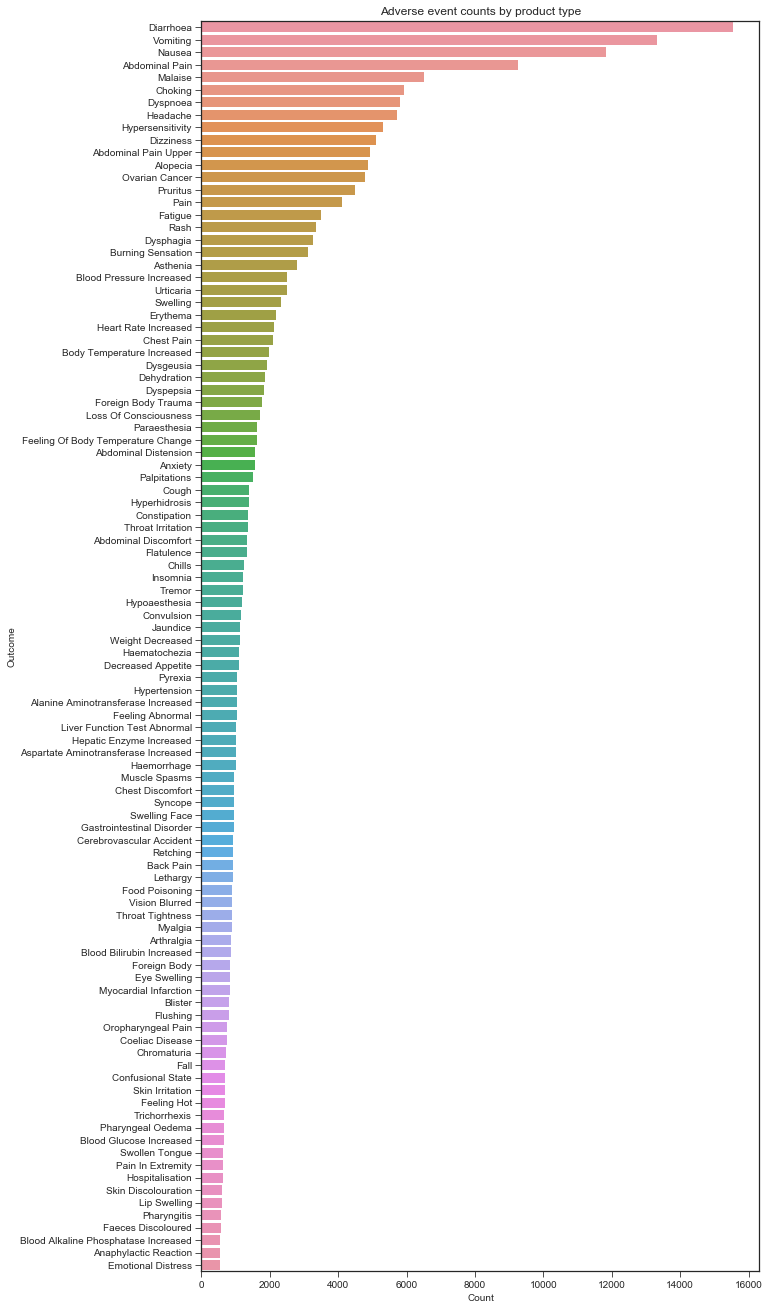

In [6]:
#the most common medical reactions/symptoms for all the food product
outcomes=[]
for _, reactions in df['Symptoms'].astype(object).str.split(",").iteritems():
    outcomes += [str(l).strip().title() for l in pd.Series(reactions).astype(object)]

outcome_df=pd.DataFrame({'Outcome':pd.Series(outcomes).value_counts().index, 'Count':pd.Series(outcomes).value_counts()})[:100]
fig, ax = plt.subplots(figsize=(10,23))
sns.barplot(x='Count',y='Outcome', data=outcome_df).set_title('Adverse event counts by product type')

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Products that caused more than one patient die')

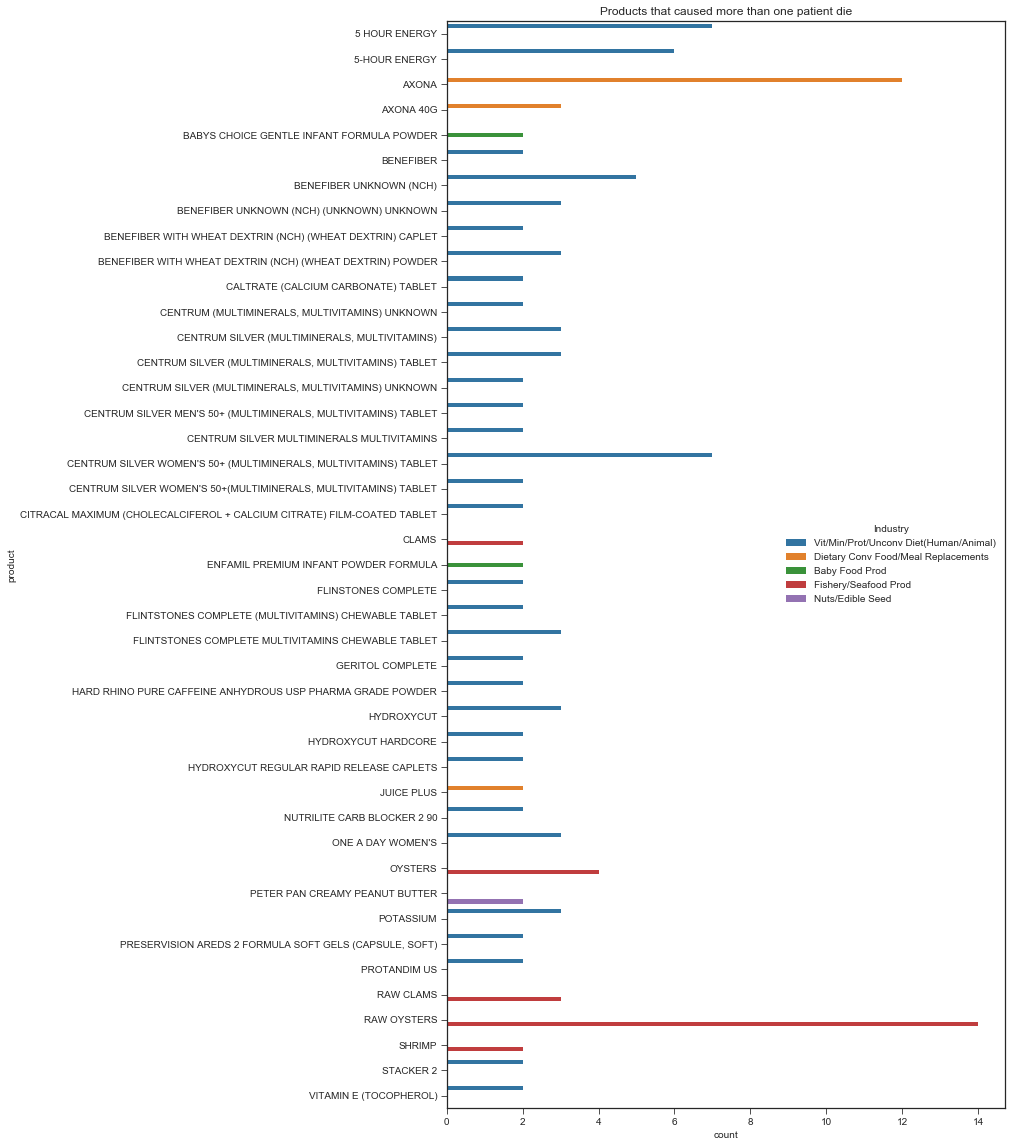

In [7]:
#the most deadly products
deadly=df[(df['Symptoms']!=np.NaN) & (df['Symptoms'].str.contains('DEATH'))]
fig, ax = plt.subplots(figsize=(10,20))
product_count=deadly.groupby('ProductBrandName').size()
product_count_large=product_count[(product_count>1) & (product_count.index!='REDACTED')]
product_count_df=pd.DataFrame({'product':product_count_large.index,'count':product_count_large}, index=None)
new=product_count_df.merge(deadly[['ProductBrandName','Industry']],how='inner', left_on='product', right_on='ProductBrandName').drop_duplicates()[['count','product','Industry']]
sns.barplot(x='count',y='product',hue='Industry',data=new).set_title("Products that caused more than one patient die")

In [8]:
## preprocessing age and deal with null value
def convert_age(row):
    
    age = row['Age']
    units = row['CI_Age Unit']
    
    # create lookup map
    lookup = {'Year(s)': 1.0,
             'Month(s)': 12.0,
             'Week(s)': 52.0,
             'Day(s)': 365.0,
             'Decade(s)': .1}    
    if units != 'Not Available':
        # return the age as years
        return float(age)/lookup[units]  
df['AgeNormed'] = df.apply(lambda row: convert_age(row), axis=1)
df['AgeNormed'].fillna(df['AgeNormed'].mean(), inplace=True)## fill the mean value to the null value
df['AgeNormed'].values.reshape(-1,1)

array([[  2.        ],
       [  2.        ],
       [ 50.39999846],
       ..., 
       [ 66.        ],
       [ 50.39999846],
       [ 50.39999846]])

In [9]:
## preprocessing gender,Symptoms,ReportDate,EventDate,Product Role
lb_make = LabelEncoder()
df['Gender']=lb_make.fit_transform(df['Gender'])
df['Gender'].values.reshape(-1,1)
df['PRI_Product Role']=lb_make.fit_transform(df['PRI_Product Role'])
df['Symptoms'] = df['Symptoms'].astype('category')
df['Symptoms'] = df['Symptoms'].cat.codes
df['Symptoms'].values.reshape(-1,1)
df[ 'ProductBrandName'] = df[ 'ProductBrandName'].astype('category')
df[ 'ProductBrandName'] = df[ 'ProductBrandName'].cat.codes
df[ 'ReportDate'] = df[ 'ReportDate'].astype('category')
df[ 'ReportDate'] = df[ 'ReportDate'].cat.codes
df[ 'EventDate'] = df[ 'EventDate'].astype('category')
df[ 'EventDate'] = df[ 'EventDate'].cat.codes
## fill the null value of EventDate
df['EventDate'].fillna(df['EventDate'].mean(), inplace=True)

In [10]:
#preprocessing outcome in five class 
outome=[1]*len(df['Outcome'])
j=0
for i in (df['Outcome']): 
    if 'HOSPITALIZATION' in i or 'VISITED A HEALTH CARE PROVIDER' in i or 'VISITED AN ER' in i:
        i=1
    elif 'DEATH' in i:
        i=2
    elif 'NON-SERIOUS INJURIES/ ILLNESS' in i:
        i=3
    elif  i == 'SERIOUS INJURIES/ ILLNESS' or ' SERIOUS INJURIES/ ILLNESS' in i or i[:25] == 'SERIOUS INJURIES/ ILLNESS':    
        i=4
    elif 'DISABILITY' in i:
        i=5
    else: i=0
    outome[j]=i
    j=j+1


In [11]:
X = df[['AgeNormed', 'Gender','PRI_FDA Industry Code','PRI_Product Role','Symptoms', 'ReportDate','EventDate']].values
X_train, X_test, Y_train, Y_test =train_test_split(X,outome,random_state = 0)

In [ ]:
#SVC
from sklearn.svm import SVC
C=[0.001, 0.1, 1, 10, 1000]
Gamma = [0.001, 0.1, 1, 10, 1000]
for i in range(0,len(C)):
    for j in range(0,len(Gamma)):
        svmModel=SVC(kernel='sigmoid',gamma=Gamma[j], C=C[i]).fit(X_train,Y_train)
        score=svmModel.score(X_test,Y_test)
        print(score)
      

0.435583362707085
0.435583362707085
0.435583362707085
0.435583362707085
0.435583362707085
0.435583362707085
0.435583362707085


In [6]:
#logistic regression
C=[10,20,30,40,50,60,70,80,90,100]
for i in range(0,len(C)):
    Log_Model=LogisticRegression(C=C[i],penalty='l2',solver='newton-cg',max_iter=300).fit(X_train,Y_train)
    accuracy=Log_Model.score(X_test,Y_test)
    print('accuracy =', accuracy)

D:\anaconda\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\linesearch.py:421: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
D:\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


accuracy = 0.5550757842791681
accuracy = 0.5551198449065915
accuracy = 0.5551198449065915
accuracy = 0.5551198449065915
accuracy = 0.5550757842791681
accuracy = 0.5551198449065915
accuracy = 0.5551198449065915
accuracy = 0.5551198449065915
accuracy = 0.5550757842791681
accuracy = 0.5551198449065915


In [8]:
Desicion Tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np
best_score=0
kfolds=5
D=[100,200,300,400,500,1000,2000,200000,400000,600000,800000,1000000]
for i in range(0,len(D)):
    treeModel=DecisionTreeClassifier(max_depth=D[i])
    scores=cross_val_score(treeModel,X_train,Y_train,cv=kfolds)
    score=np.mean(scores)
    if score>best_score:
            best_score=score
            best_parameter1=D[i]
selectedTree=treeModel=DecisionTreeClassifier(max_depth=best_parameter1).fit(X_train,Y_train)
selectedTree.score(X_test, Y_test )
print('the best the score is',selectedTree.score(X_test, Y_test ))
print('the best depth is',best_parameter1)

the best the score is 0.7102132534367289
the best depth is 2000


In [17]:
#Rondom Forest
from sklearn.ensemble import RandomForestClassifier
NumberOfModels=[700] 
d=7
D=[30]
for i in range(0,len(NumberOfModels)):
    for h in range(0,len(D)):
        forestModel=RandomForestClassifier(n_estimators=NumberOfModels[i], max_features=d, 
                                   max_depth=D[h], random_state=0).fit(X_train,Y_train)
        print("Accuracy of random forest is:", forestModel.score(X_test,Y_test), "and number of models",NumberOfModels[i],"depth",D[h])          
            




Accuracy of random forest is: 0.770135706732 and number of models 700 depth 30


In [11]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train, Y_train)
LDAmodelFitted.score(X_test,Y_test)

0.43523087768769825

In [12]:
#MLP
from sklearn.neural_network import MLPClassifier
MLPmodel=MLPClassifier(solver='adam', activation='tanh', random_state=0,hidden_layer_sizes=[200,100], alpha=0.5)
MLP=MLPmodel.fit(X_train,Y_train)
MLP.score(X_test,Y_test)

0.3412936200211491

In [20]:
#ADA
from sklearn.ensemble import AdaBoostClassifier
BoostModel= AdaBoostClassifier(base_estimator=None, n_estimators=900, learning_rate=1.0, algorithm='SAMME.R', random_state=None).fit(X_train,Y_train)
BoostModel.score(X_test,Y_test)

0.5734931265421219